In [56]:
%matplotlib inline

# Part 1

In [203]:
import numpy as np
import heapq 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix



names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
#This list represents the items that are misclassified in each iteration TOTAL
mis_clas_TOTAL = []
accuracies = {}

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    
    print "Data Set: ",ds_cnt, "-"*20
    #This list represents the items that are misclassified in each iteration for each data set
    mis_clas_TOTAL = []
    mis_clas_list = []
    
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        #This list represents the items that are misclassified in each classifier
        mis_clas_indiv = []
        clf.fit(X_train, y_train)
        print "Classifier: %s on Data Set: %s" %(str(name),str(ds_cnt))
        score = clf.score(X_test, y_test)
        accuracies[str(name)] = score
        predict = clf.predict( X_test )
        print "Confusion Matrix: \n" ,confusion_matrix(predict,y_test)
        #print "Accuracy: %0.3f" % score
        missing = np.where(y_test != predict)
        for i in missing:
            for j in i:
                mis_clas_indiv.append(j)
                mis_clas_TOTAL.append(j)
        mis_clas_list.append( list(mis_clas_indiv) )
        print "Classified incorrectly: " ,mis_clas_indiv, "\n"

    print "\nAnswers:"
    mis_clas_TOTAL = np.unique(mis_clas_TOTAL)
    flat_list = [val for sublist in mis_clas_list for val in sublist]
    count = 0
    for i in flat_list:
        if flat_list.count(i) == 6:
            flat_list.remove(i)
            #print i
            count += 1
    print "Total points classified incorrectly (all classifiers):\n", len(mis_clas_TOTAL)
    print "Point classified incorrectly by all but one classifier:\n", count
    print "Prediciton accuracy using majority voting ensemble prediction(all classifiers):\n%0.3f\n"% np.array(accuracies.values()).mean()
    print "Best set of 4 predictors to use to have highest accuracy: \n", heapq.nlargest(4, accuracies)
    print "\n"*2
        
    

Data Set:  0 --------------------
Classifier: Nearest Neighbors on Data Set: 0
Confusion Matrix: 
[[18  0]
 [ 1 21]]
Classified incorrectly:  [26] 

Classifier: Linear SVM on Data Set: 0
Confusion Matrix: 
[[17  3]
 [ 2 18]]
Classified incorrectly:  [4, 8, 20, 26, 32] 

Classifier: RBF SVM on Data Set: 0
Confusion Matrix: 
[[18  0]
 [ 1 21]]
Classified incorrectly:  [26] 

Classifier: Decision Tree on Data Set: 0
Confusion Matrix: 
[[17  0]
 [ 2 21]]
Classified incorrectly:  [10, 26] 

Classifier: Random Forest on Data Set: 0
Confusion Matrix: 
[[18  3]
 [ 1 18]]
Classified incorrectly:  [8, 12, 26, 33] 

Classifier: AdaBoost on Data Set: 0
Confusion Matrix: 
[[18  2]
 [ 1 19]]
Classified incorrectly:  [8, 26, 35] 

Classifier: Naive Bayes on Data Set: 0
Confusion Matrix: 
[[17  3]
 [ 2 18]]
Classified incorrectly:  [4, 8, 20, 26, 32] 


Answers:
Total points classified incorrectly (all classifiers):
9
Point classified incorrectly by all but one classifier:
0
Prediciton accuracy using 

### Graduate Student

In [201]:
print "Without even having to calculate anything, it is clear by inspection that the best 4 classifiers across all \
3 data sets are: \n", heapq.nlargest(4, accuracies),"\n\nThese classifiers were ALWAYS the most accurate across all \
trials"

Without even having to calculate anything, it is clear by inspection that the best 4 classifiers across all 3 data sets are: 
['Random Forest', 'RBF SVM', 'Nearest Neighbors', 'Naive Bayes'] 

These classifiers were ALWAYS the most accurate across all trials


# Part 2

In [108]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X, y = make_classification(n_features=500, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

for ds_cnt, ds in enumerate(datasets):
    print "Data Set: ",ds_cnt, "-"*20
    x_axis = []
    y_axis = []
    K_list = {}
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    for i in range(1,31):
        KNN = KNeighborsClassifier(i).fit(X_train,y_train)
        scores = cross_val_score(KNN, X_test, y_test, cv=5, scoring='f1_macro')
        print "K= %d : cross validation score  = %0.3f" % (i , scores.mean())
        K_list[scores.mean()] = i
        x_axis.append(i)
        y_axis.append(scores.mean())
        
    print ""
    key = np.array(K_list.keys()).max()
    print "Best K-value: ",K_list[key],"\n"
        

Data Set:  0 --------------------
K= 1 : cross validation score  = 0.927
K= 2 : cross validation score  = 0.927
K= 3 : cross validation score  = 0.952
K= 4 : cross validation score  = 0.952
K= 5 : cross validation score  = 0.927
K= 6 : cross validation score  = 0.927
K= 7 : cross validation score  = 0.902
K= 8 : cross validation score  = 0.877
K= 9 : cross validation score  = 0.826
K= 10 : cross validation score  = 0.824
K= 11 : cross validation score  = 0.852
K= 12 : cross validation score  = 0.824
K= 13 : cross validation score  = 0.824
K= 14 : cross validation score  = 0.848
K= 15 : cross validation score  = 0.877
K= 16 : cross validation score  = 0.877
K= 17 : cross validation score  = 0.877
K= 18 : cross validation score  = 0.877
K= 19 : cross validation score  = 0.877
K= 20 : cross validation score  = 0.877
K= 21 : cross validation score  = 0.852
K= 22 : cross validation score  = 0.852
K= 23 : cross validation score  = 0.852
K= 24 : cross validation score  = 0.877
K= 25 : cross v

### Matlab Plot and Explanation

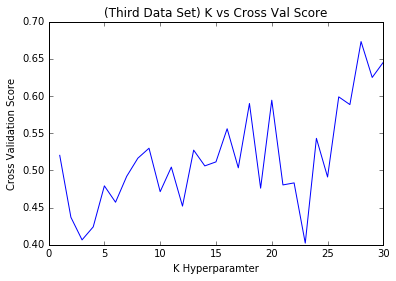

In [117]:
x = np.linspace(1,31)
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x_axis, y_axis)
plt.xlabel("K Hyperparamter")
plt.ylabel("Cross Validation Score")
plt.title("(Third Data Set) K vs Cross Val Score")

In [115]:
print "In the above example, we see the variation in the cross validation \
score for the 3rd data set in K-Nearest Neighbor Classifier. \
As was predicted in the previous section, the cross validation score peaks \
at K = 28."

In the above example, we see the variation in the cross validation score for the 3rd data set in K-Nearest Neighbor Classifier. As was predicted in the previous section, the cross validation score peaks at K = 28
